Basics of lists and arrays
-----------------------------------
Let us start with the same boilerplate code:

In [8]:
from __future__ import print_function, division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

The default solution for doing numerical linear algebra in Python is NumPy, which provides a low-level infrastructure for the calculations, and SciPy, which has many high-level functions. These are efficient, fast, and quality-checked packages that evolve fast. There are, of course, other options. For instance, [Theano](http://deeplearning.net/software/theano/) allows a 140x faster calculations of certain tensor product operations using GPUs. We focus on NumPy and SciPy for the rest of this tutorial, but do explore other options. We start with importing all functions:

In [9]:
from numpy import *

Lists and NumPy arrays are different. The latter is very similar to matrices and vectors in MATLAB. A list can be heterogeneous and vary in size, whereas a NumPy array has a fixed type and size. Here is a valid list of a float, a string, and a function:

In [14]:
l = [sqrt(2), "random text", fft]

A NumPy array of floats, for instance:

In [15]:
a = array([0.1, 0.2, 0.3])

This is a modicum more inconvenient than the MATLAB-style input of vectors. The designers of NumPy could have opted for MATLAB-style input, but this casting of arrays from list is more consistent with the language. We can change the size of Python lists, but not of arrays:

In [16]:
l.append(pi)

If you extend the size of a NumPy array, it actually does a deep copy of the existing elements. This comes from how the data is represented in memory: NumPy allocates continuous regions for efficient handling.

In [33]:
a.resize(4)
a[3] = 0.4

For matrices, you *can* ask for column-first or row-first representation. This makes sense if you know that some part of your code is written in FORTRAN or C, so you can have a zero-overhead interfacing with the lower-level code.

In [18]:
M = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(M)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


With arrays, we can do straightforward numerical operations. These are vectorized, which means they execute extremely fast:

In [34]:
print(a+1)
print(2*a)
print(sqrt(a))
print(a*a)

[ 1.1  1.2  1.3  1.4]
[ 0.2  0.4  0.6  0.8]
[ 0.31622777  0.4472136   0.54772256  0.63245553]
[ 0.01  0.04  0.09  0.16]


The last one is worth extra attention: by default, multiplication is element-wise. For a dot product, we must call the dot function:

In [35]:
dot(a, a)

0.3

NumPy arrays support slicing on multidimensional arrays, which works identically to MATLAB. Note, however, that indexing starts with 0 and the last index is non-inclusive:

In [38]:
print(a[0], a[-1])
print(a[1:3])
print(a[::2])
print(a[a<0.2])
print(M[:,2])

0.1 0.4
[ 0.2  0.3]
[ 0.1  0.3]
[ 0.1]
[3 6 9]


Reshaping is also allowed:

In [41]:
print(M.reshape(1, 9))

[[1 2 3 4 5 6 7 8 9]]


There are a few other convenience functions built in the arrays:

In [42]:
print(a.sum(), a.min(), a.max())

1.0 0.1 0.4


In matrices, we can do these row-wise or column-wise:

In [43]:
M.sum(axis=0) # Sum of each column

array([12, 15, 18])

SciPy
-------
Sparse matrices, optimization, basic signal processing, interpolation, Fourier transforms, statistics, and even more linear algebra reside in this package. There are usually more featureful packages for most of the functionality, but SciPy is a decent common denominator. SciPy builds on NumPy, and this is true for most other scientific packages: NumPy is indispensable, the rest depends on what you want to do and how much control you want over the algorithms. For instance, using SciPy, the transfer-matrix method is about a hundred lines of straightforward code.

As an example, we look at optimization by a quasi-Newton method, the Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm, which is the same as MATLAB uses in ``fminunc``. The following [example](https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/optimize.html) is from the SciPy tutorial. We import the ``minimize`` function and define a function with an initial point:

In [44]:
from scipy.optimize import minimize
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
x0 = array([1.3, 0.7, 0.8, 1.9, 1.2])

In [45]:
res = minimize(rosen, x0)
print(res.x)

[ 0.99999933  0.99999866  0.99999727  0.99999449  0.99998874]


What is even more important in SciPy is the sparse matrix package. They require some understanding of how different types of sparse matrices are stored, but in exchange, you can tune your algorithm better than in MATLAB or Mathematica.

In [62]:
import scipy.sparse as sparse
S = sparse.rand(10, 20, density=0.01)
S

<10x20 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in COOrdinate format>

In [63]:
u, s, vt = sparse.linalg.svds(S, 2)
s

array([ 0.63560912,  0.87527671])

QuTiP
-------

QuTiP is the Quantum Toolbox in Python that builds on Numpy, SciPy, MatPlotLib and Cython. It relies on sparse data structures to calculate the dynamics of open systems, but it has hundreds of other uses. For instance, plotting Bloch spheres.

In [3]:
from qutip import *
%matplotlib inline

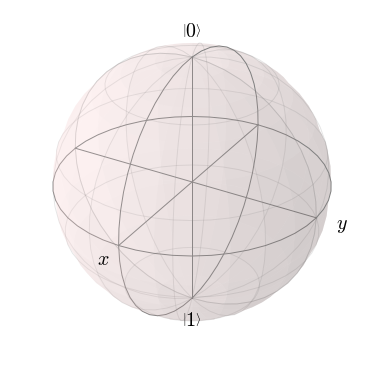

In [4]:
b = Bloch()
b.make_sphere()

For a more meaningful example, we take a look at the Heisenberg Hamiltonian and its time evolution:

$H =  J \sum_{i=1}^{N-1} [ \sigma^x_{i} \sigma^x_{i+1} + \sigma^y_{i} \sigma^y_{i+1} + \sigma^z_{i} \sigma^z_{i+1}]$

In [11]:
def integrate(N, J, psi0, tlist, gamma):

    sx, sy, sz = [], [], []

    for n in range(N):
        ops = [qeye(2) for _ in range(N)]

        ops[n] = sigmax()
        sx.append(tensor(ops))

        ops[n] = sigmay()
        sy.append(tensor(ops))

        ops[n] = sigmaz()
        sz.append(tensor(ops))

    # construct the hamiltonian
    H = sum(J*(sx[n]*sx[n+1] + sy[n]*sy[n+1] + sz[n]*sz[n+1])
            for n in range(N-1))
    
    # collapse operators
    c_ops = [sqrt(gamma)*sz[n] for n in range(N) if gamma>0.0]
    # evolve and calculate expectation values with Monte Carlo
    result = mcsolve(H, psi0, tlist, c_ops, sz, ntraj=250)

    return result.expect

In [19]:
N = 8      # number of spins
J = 0.2*pi
gamma = 0.01 # dephasing rate

# intial state, first spin in state |1>, the rest in state |0>
psi_list = [basis(2,1)]
psi_list.extend([basis(2,0) for _ in range(N-1)])
psi0 = tensor(psi_list)

tlist = linspace(0, 50, 200)

sz_expt = integrate(N, J, psi0, tlist, gamma)

10.0%. Run time:   2.70s. Est. time left: 00:00:00:24
20.0%. Run time:   5.49s. Est. time left: 00:00:00:21
30.0%. Run time:   8.96s. Est. time left: 00:00:00:20
40.0%. Run time:  11.27s. Est. time left: 00:00:00:16
50.0%. Run time:  13.48s. Est. time left: 00:00:00:13
60.0%. Run time:  15.69s. Est. time left: 00:00:00:10
70.0%. Run time:  17.85s. Est. time left: 00:00:00:07
80.0%. Run time:  20.06s. Est. time left: 00:00:00:05
90.0%. Run time:  22.16s. Est. time left: 00:00:00:02
100.0%. Run time:  24.40s. Est. time left: 00:00:00:00
Total run time:  24.46s


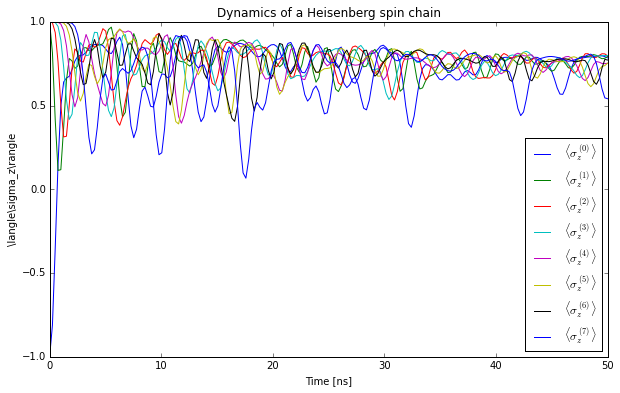

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
for n in range(N):
    ax.plot(tlist, real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'\langle\sigma_z\rangle')
ax.set_title(r'Dynamics of a Heisenberg spin chain');

Convex optimization and semidefinite programmes
-----------------------------------------------------
This section is especially for the fans of semidefinite programming relaxations. It requires further packages: [PICOS](http://picos.zib.de), which is the Python equivalent of [Yalmip](http://users.isy.liu.se/johanl/yalmip/), and [CVXOPT](http://cvxopt.org/), which is similar to the MATLAB toolbox [CVX](http://cvxr.com/cvx/). If you are interested in the convex relaxations of polynomial optimization problems, take a look at [Ncpol2sdpa](http://peterwittek.github.io/ncpol2sdpa/), which is similar to [Gloptipoly](http://homepages.laas.fr/henrion/software/gloptipoly/) and [SparsePOP](http://sourceforge.net/projects/sparsepop/) in MATLAB, except that it also works for noncommutative variables.

This example is the relaxation of a commutative polynomial optimization problem consisting of a moment matrix and a localizing matrix written as

$$ \min_{y}2y_{12}$$

such that
$$\left[ \begin{array}{c|cc|cc}1 & y_{1} & y_{2} & y_{12} & y_{22}\\\hline{}y_{1} & y_{1} & y_{12} & y_{12} & y_{122}\\y_{2} & y_{12} & y_{22} & y_{122} & y_{222}\\\hline{}y_{12} & y_{12} & y_{122} & y_{122} & y_{1222}\\y_{22} & y_{122} & y_{222} & y_{1222} & y_{2222}\end{array} \right] \succeq{}0$$

$$\left[ \begin{array}{c|cc}-y_{22}+y_{2}+0.5 & -y_{122}+y_{12}+0.5y_{1} & -y_{222}+y_{22}+0.5y_{2}\\\hline{}-y_{122}+y_{12}+0.5y_{1} & -y_{122}+y_{12}+0.5y_{1} & -y_{1222}+y_{122}+0.5y_{12}\\-y_{222}+y_{22}+0.5y_{2} & -y_{1222}+y_{122}+0.5y_{12} & -y_{2222}+y_{222}+0.5y_{22}\end{array}\right]\succeq{}0.$$

In [21]:
import picos
prob = picos.Problem()
M = prob.add_variable('M',(5,5),vtype='symmetric')
prob.add_constraint(M >> 0)
prob.add_constraint(M[0,0]==1)
prob.add_constraint(-M[1,1]+M[0,1]==0)
#y_12
prob.add_constraint(-M[0,3]+M[1,2]==0)
prob.add_constraint(-M[0,3]+M[1,3]==0)
#y_22
prob.add_constraint(-M[0,4]+M[2,2]==0)
#y_122
prob.add_constraint(-M[1,4]+M[2,3]==0)
prob.add_constraint(-M[1,4]+M[3,3]==0)
 
prob.set_objective('min', 2*M[1,2])
 
Mineq = prob.add_variable('Mineq',(3,3),vtype='symmetric')
prob.add_constraint(Mineq >> 0)
 
prob.add_constraint(Mineq[0,0]==-M[2,2]+M[0,2]+0.5)
prob.add_constraint(Mineq[0,1]==-M[1,4]+M[0,3]+0.5*M[0,1])
prob.add_constraint(Mineq[0,2]==-M[2,4]+M[0,4]+0.5*M[0,2])
prob.add_constraint(-Mineq[1,1]+Mineq[0,1]==0)
prob.add_constraint(Mineq[1,2]==-M[3,4]+M[2,3]+0.5*M[0,3])
prob.add_constraint(Mineq[2,2]==-M[4,4]+M[2,4]+0.5*M[0,4])

sol = prob.solve(solver='cvxopt', verbose = 0)
print(sol)

ImportError: No module named 'picos'